# 라이브러리와 데이터 로드

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob

In [ ]:
name_type = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/pokemon/pokemon.csv")
name_type

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN
...,...,...,...
804,stakataka,Rock,Steel
805,blacephalon,Fire,Ghost
806,zeraora,Electric,NaN
807,meltan,Steel,NaN


## 이미지 경로 & 출력

In [ ]:
PATH = "/content/drive/MyDrive/Colab Notebooks/data/pokemon"

In [ ]:
img_paths = glob.glob(PATH + "/images/*")
img_paths[:5]

['/content/drive/MyDrive/Colab Notebooks/data/pokemon/images/bulbasaur.png',
 '/content/drive/MyDrive/Colab Notebooks/data/pokemon/images/charmander.png',
 '/content/drive/MyDrive/Colab Notebooks/data/pokemon/images/charizard.png',
 '/content/drive/MyDrive/Colab Notebooks/data/pokemon/images/venusaur.png',
 '/content/drive/MyDrive/Colab Notebooks/data/pokemon/images/squirtle.png']

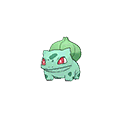

In [ ]:
from PIL import Image

Image.open(img_paths[0])

# 전처리 : y 생성

In [ ]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()

In [ ]:
name_type["Type1"]

0         Grass
1         Grass
2         Grass
3          Fire
4          Fire
         ...   
804        Rock
805        Fire
806    Electric
807       Steel
808       Steel
Name: Type1, Length: 809, dtype: object

In [ ]:
name_type["Type1"].nunique()

18

In [ ]:
enc_y = encoder.fit_transform(name_type["Type1"])
enc_y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
enc_y.shape

(809, 18)

In [ ]:
enc_y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
np.argmax(enc_y[0])

9

In [ ]:
encoder.classes_[np.argmax(enc_y[0])]

'Grass'

In [ ]:
y = []

for i in enc_y:
    max_idx = np.argmax(i)
    # print(max_idx)
    y.append(max_idx)

In [ ]:
y = np.array(y)
y

array([ 9,  9,  9,  6,  6,  6, 17, 17, 17,  0,  0,  0,  0,  0,  0, 12, 12,
       12, 12, 12, 12, 12, 13, 13,  3,  3, 10, 10, 13, 13, 13, 13, 13, 13,
        4,  4,  6,  6, 12, 12, 13, 13,  9,  9,  9,  0,  0,  0,  0, 10, 10,
       12, 12, 17, 17,  5,  5,  6,  6, 17, 17, 17, 14, 14, 14,  5,  5,  5,
        9,  9,  9, 17, 17, 15, 15, 15,  6,  6, 17, 17,  3,  3, 12, 12, 12,
       17, 17, 13, 13, 17, 17,  8,  8,  8, 15, 14, 14, 17, 17,  3,  3,  9,
        9, 10, 10,  5,  5, 12, 13, 13, 10, 10, 12,  9, 12, 17, 17, 17, 17,
       17, 17, 14,  0, 11,  3,  6,  0, 12, 17, 17, 17, 12, 12, 17,  3,  6,
       12, 15, 15, 15, 15, 15, 12, 11,  3,  6,  2,  2,  2, 14, 14,  9,  9,
        9,  6,  6,  6, 17, 17, 17, 12, 12, 12, 12,  0,  0,  0,  0, 13, 17,
       17,  3,  4, 12,  4,  4, 14, 14,  3,  3,  3,  9, 17, 17, 15, 17,  9,
        9,  9, 12,  9,  9,  0, 17, 17, 14,  1,  1, 17,  8, 14, 14, 12,  0,
        0, 12, 10, 16,  4,  4, 17,  0,  0,  0,  1, 12, 12,  6,  6, 11, 11,
       17, 17, 17, 11, 17

In [ ]:
encoder.classes_

array(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'], dtype='<U8')

In [ ]:
len(encoder.classes_)

18

# 전처리 : X

In [ ]:
import cv2

cv2.imread(img_paths[0]).shape

(120, 120, 3)

In [ ]:
cv2.imread(img_paths[788])

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
a = (cv2.imread(img_paths[788]))

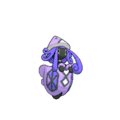

In [ ]:
Image.fromarray(a)

In [ ]:
cv2.imread(img_paths[78])

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

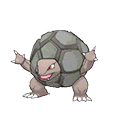

In [ ]:
Image.open(img_paths[78])

In [ ]:
b = (cv2.imread(img_paths[78]))

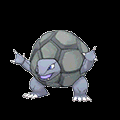

In [ ]:
Image.fromarray(b)

In [ ]:
c = b + 255

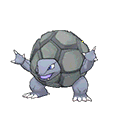

In [ ]:
Image.fromarray(c)

In [ ]:
cv2.imread(img_paths[0]).shape

(120, 120, 3)

In [ ]:
for img_path in img_paths[:20]:
    print(cv2.imread(img_path).shape)

(120, 120, 3)
(120, 120, 3)
(120, 120, 3)
(120, 120, 3)
(120, 120, 3)
(120, 120, 3)
(120, 120, 3)
(120, 120, 3)
(120, 120, 3)
(120, 120, 3)
(120, 120, 3)
(120, 120, 3)
(120, 120, 3)
(120, 120, 3)
(120, 120, 3)
(120, 120, 3)
(120, 120, 3)
(120, 120, 3)
(120, 120, 3)
(120, 120, 3)


In [ ]:
img_paths[0]

'/content/drive/MyDrive/Colab Notebooks/data/pokemon/images/bulbasaur.png'

In [ ]:
img_paths[:5]

['/content/drive/MyDrive/Colab Notebooks/data/pokemon/images/bulbasaur.png',
 '/content/drive/MyDrive/Colab Notebooks/data/pokemon/images/charmander.png',
 '/content/drive/MyDrive/Colab Notebooks/data/pokemon/images/charizard.png',
 '/content/drive/MyDrive/Colab Notebooks/data/pokemon/images/venusaur.png',
 '/content/drive/MyDrive/Colab Notebooks/data/pokemon/images/squirtle.png']

In [ ]:
cv2.imread(img_paths[0]) / 255

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [ ]:
np.min(cv2.imread(img_paths[0]) / 255), np.max(cv2.imread(img_paths[0]) / 255)

(0.0, 1.0)

In [ ]:
Image.fromarray(cv2.imread(img_paths[0]) / 255)

TypeError: ignored

In [ ]:
from tqdm import tqdm

X = []

for img_path in tqdm(img_paths):
    X.append((cv2.imread(img_path) / 255).astype(np.uint8))

100%|██████████| 809/809 [00:02<00:00, 396.47it/s]


In [ ]:
len(X)

809

In [ ]:
len(y)

809

In [ ]:
type(X[0])

numpy.ndarray

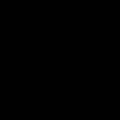

In [ ]:
Image.fromarray(X[0])

In [ ]:
a = cv2.imread(img_paths[-1])
a

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

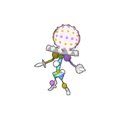

In [ ]:
Image.fromarray(a)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)

In [ ]:
x_train

[array([[[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        ...,
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]],
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [1, 1, 1],
         [1, 1, 1]]], dtype=uint8), array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0

In [ ]:
type(x_test)

list

In [ ]:
np.array(x_train).shape

(647, 120, 120, 3)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

NameError: ignored

In [ ]:
x_test[:5]

array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]],

        ...,

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ]

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


model = Sequential()
# 입력층
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='selu', input_shape=(120, 120, 3)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='selu', input_shape=(120, 120, 3)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

# Fully-connected layer

# 출력층
model.add(Flatten())
model.add(Dense(units=128, activation="selu"))
model.add(Dense(units=64, activation="selu"))
model.add(Dense(units=32, activation="selu"))
model.add(Dense(len(encoder.classes_), activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 118, 118, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 59, 59, 16)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 59, 59, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 57, 57, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 28, 28, 16)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 28, 28, 16)       

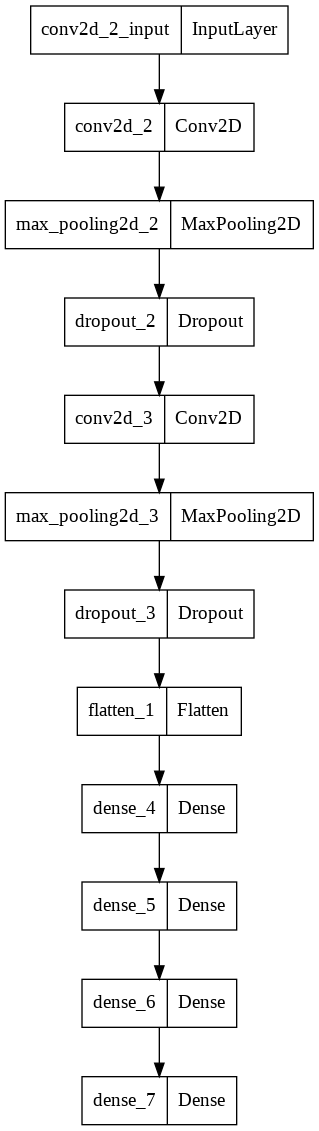

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=2)

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, callbacks=early_stop)

Epoch 1/10
21/21 [==============================] - 7s 357ms/step - loss: 2.3633 - accuracy: 0.2859 - val_loss: 3.5011 - val_accuracy: 0.0432
Epoch 2/10
21/21 [==============================] - 7s 354ms/step - loss: 2.2182 - accuracy: 0.3385 - val_loss: 3.3115 - val_accuracy: 0.0802
Epoch 3/10
21/21 [==============================] - 7s 353ms/step - loss: 2.1083 - accuracy: 0.3292 - val_loss: 3.0130 - val_accuracy: 0.1111
Epoch 4/10
21/21 [==============================] - 7s 352ms/step - loss: 1.8632 - accuracy: 0.4436 - val_loss: 3.8181 - val_accuracy: 0.0864
Epoch 5/10
21/21 [==============================] - 7s 354ms/step - loss: 1.6724 - accuracy: 0.5100 - val_loss: 4.7225 - val_accuracy: 0.0679


In [ ]:
df_hist = pd.DataFrame(history.history)
df_hist

,loss,accuracy,val_loss,val_accuracy
0,2.363283,0.285935,3.501103,0.043210
1,2.218189,0.338485,3.311471,0.080247
2,2.108326,0.329212,3.013008,0.111111
3,1.863232,0.443586,3.818105,0.086420
4,1.672436,0.510046,4.722502,0.067901


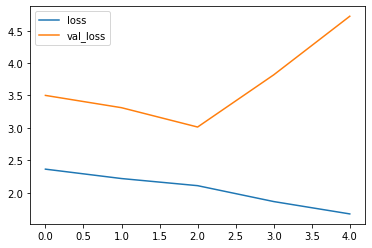

In [ ]:
df_hist[["loss", "val_loss"]].plot()

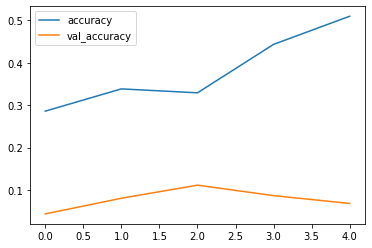

In [ ]:
df_hist[["accuracy", "val_accuracy"]].plot()

In [ ]:
t = np.array([[1, 2, 3], [4, 5, 6]])
t

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
t - 1

array([[0, 1, 2],
       [3, 4, 5]])

In [ ]:
t / 2

array([[0.5, 1. , 1.5],
       [2. , 2.5, 3. ]])

In [ ]:
import tensorflow as tf

cifar = tf.keras.datasets.cifar100
(x_train, y_train), (x_test, y_test) = cifar.load_data()
model = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_shape=(32, 32, 3),
    classes=100,)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5, batch_size=64)

169001437/169001437 [==============================] - 2s 0us/step
Epoch 1/5


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


 45/782 [>.............................] - ETA: 55:45 - loss: 5.7861 - accuracy: 0.0233

KeyboardInterrupt: ignored